In [93]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
students = pd.read_csv("students.csv")
swipes = pd.read_csv("swipes.csv")

In [3]:
students.head()

,Student,GENDER_CD,CLASS_YR,Fall_2011,Freshman
0,67130,F,2012,Columbus,Charleston
1,101400,F,2012,Providence,Fargo
2,118306,F,2012,Dallas,Detroit
3,30533,M,2012,New York,Detroit
4,185911,M,2012,New York,Newark


In [4]:
swipes.head()

,178,8/30/2011 0:00:00,5:22:32 PM,Dinner,MUAero01,14MF,0
0,178,8/31/2011 0:00:00,12:21:06 PM,Lunch,MUAero01,14MF,0
1,178,8/31/2011 0:00:00,5:24:17 PM,Dinner,THAero1,14MF,0
2,178,9/1/2011 0:00:00,1:05:55 PM,Lunch,MUAero01,14MF,0
3,178,9/1/2011 0:00:00,5:32:16 PM,Dinner,MUAero01,14MF,0
4,178,9/2/2011 0:00:00,11:21:00 AM,Lunch,MUAero01,14MF,0


In [5]:
students[students['Student'] == 239]

,Student,GENDER_CD,CLASS_YR,Fall_2011,Freshman
592,239,M,2013,Eugene,Topeka


In [6]:
swipes.columns = ['student_id', 'date', 'time', 'meal', 'location', 'meal_plan', 'unknown']

In [7]:
swipes.head()

,student_id,date,time,meal,location,meal_plan,unknown
0,178,8/31/2011 0:00:00,12:21:06 PM,Lunch,MUAero01,14MF,0
1,178,8/31/2011 0:00:00,5:24:17 PM,Dinner,THAero1,14MF,0
2,178,9/1/2011 0:00:00,1:05:55 PM,Lunch,MUAero01,14MF,0
3,178,9/1/2011 0:00:00,5:32:16 PM,Dinner,MUAero01,14MF,0
4,178,9/2/2011 0:00:00,11:21:00 AM,Lunch,MUAero01,14MF,0


In [8]:
print(len(swipes))

337174


In [9]:
athletes = swipes[swipes['meal_plan'] == 'ATHL']

In [10]:
print(len(athletes))

134


In [11]:
print(len(swipes['student_id'].unique()))

1620


# Sort by date

In [12]:
swipes.sort_values(by='date', ascending=False)

,student_id,date,time,meal,location,meal_plan,unknown
246854,156078,9/9/2011 0:00:00,12:37:56 PM,Lunch,THAero1,19MF,0
129232,82318,9/9/2011 0:00:00,12:07:21 PM,Lunch,THAero1,19MF,0
188555,119039,9/9/2011 0:00:00,5:49:37 PM,Dinner,THAero1,19MF,0
188769,119309,9/9/2011 0:00:00,12:31:55 PM,Lunch,MUAero01,19MF,0
188770,119309,9/9/2011 0:00:00,6:23:08 PM,Dinner,THAero1,19MF,0
...,...,...,...,...,...,...,...
273077,174154,10/1/2011 0:00:00,11:49:48 AM,Brunch,MUAero01,19MF,0
273078,174154,10/1/2011 0:00:00,5:24:10 PM,Dinner,THAero1,19MF,0
322094,205576,10/1/2011 0:00:00,5:54:57 PM,Dinner,THAero1,19MF,0
322093,205576,10/1/2011 0:00:00,12:56:56 PM,Brunch,THAero1,19MF,0


In [13]:
students.head()

,Student,GENDER_CD,CLASS_YR,Fall_2011,Freshman
0,67130,F,2012,Columbus,Charleston
1,101400,F,2012,Providence,Fargo
2,118306,F,2012,Dallas,Detroit
3,30533,M,2012,New York,Detroit
4,185911,M,2012,New York,Newark


In [14]:
id_to_dorm = dict()
id_to_freshman = dict()
id_to_class = dict()
id_to_gender = dict()

for i in range(len(students)):
    row = students.iloc[i]
    student_id = row['Student']
    gender = row['GENDER_CD']
    class_year = row['CLASS_YR']
    current_dorm = row['Fall_2011']
    freshman_dorm = row['Freshman']

    id_to_dorm[student_id] = current_dorm
    id_to_freshman[student_id] = freshman_dorm
    id_to_class[student_id] = class_year
    id_to_gender[student_id] = gender

In [15]:
swipes.head()

,student_id,date,time,meal,location,meal_plan,unknown
0,178,8/31/2011 0:00:00,12:21:06 PM,Lunch,MUAero01,14MF,0
1,178,8/31/2011 0:00:00,5:24:17 PM,Dinner,THAero1,14MF,0
2,178,9/1/2011 0:00:00,1:05:55 PM,Lunch,MUAero01,14MF,0
3,178,9/1/2011 0:00:00,5:32:16 PM,Dinner,MUAero01,14MF,0
4,178,9/2/2011 0:00:00,11:21:00 AM,Lunch,MUAero01,14MF,0


In [16]:
swipes['current_dorm'] = swipes['student_id'].map(id_to_dorm)
swipes['first_dorm'] = swipes['student_id'].map(id_to_freshman)
swipes['class_year'] = swipes['student_id'].map(id_to_class)
swipes['gender'] = swipes['student_id'].map(id_to_gender)

In [17]:
swipes.head()

,student_id,date,time,meal,location,meal_plan,unknown,current_dorm,first_dorm,class_year,gender
0,178,8/31/2011 0:00:00,12:21:06 PM,Lunch,MUAero01,14MF,0,Providence,Indianapolis,2014,M
1,178,8/31/2011 0:00:00,5:24:17 PM,Dinner,THAero1,14MF,0,Providence,Indianapolis,2014,M
2,178,9/1/2011 0:00:00,1:05:55 PM,Lunch,MUAero01,14MF,0,Providence,Indianapolis,2014,M
3,178,9/1/2011 0:00:00,5:32:16 PM,Dinner,MUAero01,14MF,0,Providence,Indianapolis,2014,M
4,178,9/2/2011 0:00:00,11:21:00 AM,Lunch,MUAero01,14MF,0,Providence,Indianapolis,2014,M


In [18]:
print(len(swipes[swipes['meal_plan'] == '14MF']))
print(len(swipes[swipes['meal_plan'] == '19MF']))

45869
284997


In [19]:
students.head()

,Student,GENDER_CD,CLASS_YR,Fall_2011,Freshman
0,67130,F,2012,Columbus,Charleston
1,101400,F,2012,Providence,Fargo
2,118306,F,2012,Dallas,Detroit
3,30533,M,2012,New York,Detroit
4,185911,M,2012,New York,Newark


In [20]:
swipes.head()

,student_id,date,time,meal,location,meal_plan,unknown,current_dorm,first_dorm,class_year,gender
0,178,8/31/2011 0:00:00,12:21:06 PM,Lunch,MUAero01,14MF,0,Providence,Indianapolis,2014,M
1,178,8/31/2011 0:00:00,5:24:17 PM,Dinner,THAero1,14MF,0,Providence,Indianapolis,2014,M
2,178,9/1/2011 0:00:00,1:05:55 PM,Lunch,MUAero01,14MF,0,Providence,Indianapolis,2014,M
3,178,9/1/2011 0:00:00,5:32:16 PM,Dinner,MUAero01,14MF,0,Providence,Indianapolis,2014,M
4,178,9/2/2011 0:00:00,11:21:00 AM,Lunch,MUAero01,14MF,0,Providence,Indianapolis,2014,M


In [21]:
meal_plans = dict()
already_checked = []

for i in range(len(swipes)):
    row = swipes.iloc[i]
    current_id = row['student_id']
    meal_plan = row['meal_plan']

    if current_id not in already_checked:
        meal_plans[current_id] = meal_plan
        already_checked.append(current_id)
    else:
        continue

In [22]:
students['meal_plan'] = students['Student'].map(meal_plans)

In [23]:
students.head()

,Student,GENDER_CD,CLASS_YR,Fall_2011,Freshman,meal_plan
0,67130,F,2012,Columbus,Charleston,19MF
1,101400,F,2012,Providence,Fargo,19MF
2,118306,F,2012,Dallas,Detroit,14MF
3,30533,M,2012,New York,Detroit,19MF
4,185911,M,2012,New York,Newark,19MF


In [24]:
swipes.head()

,student_id,date,time,meal,location,meal_plan,unknown,current_dorm,first_dorm,class_year,gender
0,178,8/31/2011 0:00:00,12:21:06 PM,Lunch,MUAero01,14MF,0,Providence,Indianapolis,2014,M
1,178,8/31/2011 0:00:00,5:24:17 PM,Dinner,THAero1,14MF,0,Providence,Indianapolis,2014,M
2,178,9/1/2011 0:00:00,1:05:55 PM,Lunch,MUAero01,14MF,0,Providence,Indianapolis,2014,M
3,178,9/1/2011 0:00:00,5:32:16 PM,Dinner,MUAero01,14MF,0,Providence,Indianapolis,2014,M
4,178,9/2/2011 0:00:00,11:21:00 AM,Lunch,MUAero01,14MF,0,Providence,Indianapolis,2014,M


In [31]:
old_dates = list(swipes['date'])
new_dates = [i[:-8] for i in old_dates]
swipes['new_date'] = new_dates

In [39]:
swipes['date_time'] = swipes['new_date'] + ' ' + swipes['time']

In [40]:
swipes.head()

,student_id,date,time,meal,location,meal_plan,unknown,current_dorm,first_dorm,class_year,gender,new_date,date_time
0,178,8/31/2011 0:00:00,12:21:06 PM,Lunch,MUAero01,14MF,0,Providence,Indianapolis,2014,M,8/31/2011,8/31/2011 12:21:06 PM
1,178,8/31/2011 0:00:00,5:24:17 PM,Dinner,THAero1,14MF,0,Providence,Indianapolis,2014,M,8/31/2011,8/31/2011 5:24:17 PM
2,178,9/1/2011 0:00:00,1:05:55 PM,Lunch,MUAero01,14MF,0,Providence,Indianapolis,2014,M,9/1/2011,9/1/2011 1:05:55 PM
3,178,9/1/2011 0:00:00,5:32:16 PM,Dinner,MUAero01,14MF,0,Providence,Indianapolis,2014,M,9/1/2011,9/1/2011 5:32:16 PM
4,178,9/2/2011 0:00:00,11:21:00 AM,Lunch,MUAero01,14MF,0,Providence,Indianapolis,2014,M,9/2/2011,9/2/2011 11:21:00 AM


In [42]:
swipes['date_time'] = pd.to_datetime(swipes['date_time'])

In [43]:
swipes.head()

,student_id,date,time,meal,location,meal_plan,unknown,current_dorm,first_dorm,class_year,gender,new_date,date_time
0,178,8/31/2011 0:00:00,12:21:06 PM,Lunch,MUAero01,14MF,0,Providence,Indianapolis,2014,M,8/31/2011,2011-08-31 12:21:06
1,178,8/31/2011 0:00:00,5:24:17 PM,Dinner,THAero1,14MF,0,Providence,Indianapolis,2014,M,8/31/2011,2011-08-31 17:24:17
2,178,9/1/2011 0:00:00,1:05:55 PM,Lunch,MUAero01,14MF,0,Providence,Indianapolis,2014,M,9/1/2011,2011-09-01 13:05:55
3,178,9/1/2011 0:00:00,5:32:16 PM,Dinner,MUAero01,14MF,0,Providence,Indianapolis,2014,M,9/1/2011,2011-09-01 17:32:16
4,178,9/2/2011 0:00:00,11:21:00 AM,Lunch,MUAero01,14MF,0,Providence,Indianapolis,2014,M,9/2/2011,2011-09-02 11:21:00


In [44]:
# swipes.to_csv("swipes_updated1.csv")

In [45]:
# students.to_csv("students_updated1.csv")

In [54]:
swipes['time'] = pd.to_datetime(swipes['time'])

/tmp/ipykernel_66258/3274860016.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  swipes['time'] = pd.to_datetime(swipes['time'])


In [55]:
swipes['time'].dtype

dtype('<M8[ns]')

In [57]:
thorne_dinner = swipes[(swipes['meal'] == 'Dinner') & (swipes['location'] == 'THAero1')]

In [59]:
min_dinner_time = min(thorne_dinner['time'])
max_dinner_time = max(thorne_dinner['time'])

In [69]:
five_min = datetime.timedelta(0,300)

In [72]:
error = False
dinner_buckets = []
current_time = min_dinner_time

while error == False:
    if current_time >= max_dinner_time:
        dinner_buckets.append(current_time)
        error = True
    else:
        dinner_buckets.append(current_time)
        current_time = current_time + five_min

## Get the number of swipes during each time interval (bucket)

In [80]:
test_lower = dinner_buckets[10]
test_upper = dinner_buckets[11]

# get all swipes between these types
test = swipes[(swipes['time'] >= test_lower) & (swipes['time'] <= test_upper)]
test.head()

,student_id,date,time,meal,location,meal_plan,unknown,current_dorm,first_dorm,class_year,gender,new_date,date_time
1,178,8/31/2011 0:00:00,2024-02-29 17:24:17,Dinner,THAero1,14MF,0,Providence,Indianapolis,2014,M,8/31/2011,2011-08-31 17:24:17
55,178,9/28/2011 0:00:00,2024-02-29 17:21:04,Dinner,MUAero01,14MF,0,Providence,Indianapolis,2014,M,9/28/2011,2011-09-28 17:21:04
59,178,9/30/2011 0:00:00,2024-02-29 17:24:24,Dinner,MUAero01,14MF,0,Providence,Indianapolis,2014,M,9/30/2011,2011-09-30 17:24:24
160,178,11/28/2011 0:00:00,2024-02-29 17:20:27,Dinner,MUAero01,14MF,0,Providence,Indianapolis,2014,M,11/28/2011,2011-11-28 17:20:27
400,239,12/6/2011 0:00:00,2024-02-29 17:24:45,Dinner,THAero1,19MF,0,Eugene,Topeka,2013,M,12/6/2011,2011-12-06 17:24:45


In [135]:
num_swipes = []
all_bounds = []

In [136]:
for i in range(len(dinner_buckets)):
    try:
        lower_bound = dinner_buckets[i]
        upper_bound = dinner_buckets[i+1]
    except:
        lower_bound = dinner_buckets[i]
        bounded = swipes[(swipes['time'] >= lower_bound)]
        num_swipes.append(len(bounded))
        all_bounds.append(str(lower_bound))
        # all_bounds.append((str(lower_bound), 'end'))
        
    
    bounded = swipes[(swipes['time'] >= lower_bound) & (swipes['time'] <= upper_bound)]
    num_swipes.append(len(bounded))

    new_lower_bound = str(lower_bound)[11:]
    if i != 0:
        if all_bounds[i-1][0:2] == new_lower_bound[0:2]:
            new_lower_bound = new_lower_bound[3:]

    all_bounds.append(new_lower_bound)
    # new_lower_bound = str(lower_bound)[11:]
    # new_upper_bound = str(upper_bound)[11:]
    # all_bounds.append((new_lower_bound, new_upper_bound))

Text(0.5, 1.0, 'Dinner Swipes (All Dinings Halls)')

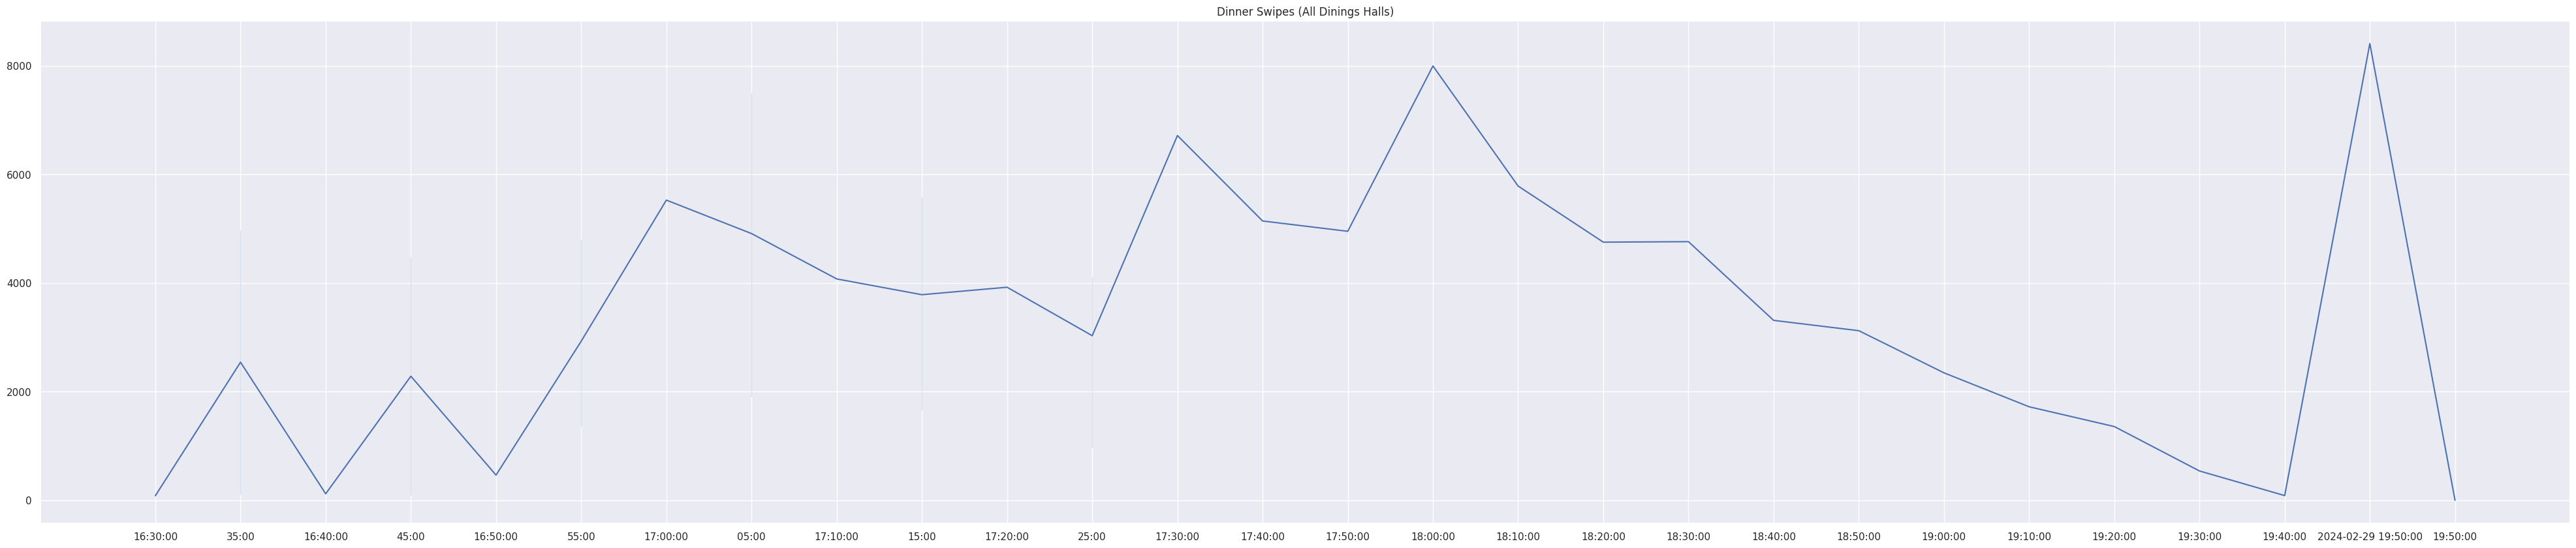

In [146]:
plt.figure(figsize=(50,10))
sns.set()
sns.lineplot(x=all_bounds, y=num_swipes)
plt.title("Dinner Swipes (All Dinings Halls)")

In [144]:
moulton_dinner = swipes[(swipes['meal'] == 'Dinner') & (swipes['location'] == 'MUAero01')]

In [151]:
num_swipes_moult = []

In [152]:
for i in range(len(dinner_buckets)):
    try:
        lower_bound = dinner_buckets[i]
        upper_bound = dinner_buckets[i+1]
    except:
        lower_bound = dinner_buckets[i]
        bounded = moulton_dinner[(moulton_dinner['time'] >= lower_bound)]
        num_swipes_moult.append(len(bounded))
        # all_bounds.append(str(lower_bound))
        # all_bounds.append((str(lower_bound), 'end'))
        
    
    bounded = moulton_dinner[(moulton_dinner['time'] >= lower_bound) & (moulton_dinner['time'] <= upper_bound)]
    num_swipes_moult.append(len(bounded))

    # new_lower_bound = str(lower_bound)[11:]
    # if i != 0:
    #     if all_bounds[i-1][0:2] == new_lower_bound[0:2]:
    #         new_lower_bound = new_lower_bound[3:]

    # all_bounds.append(new_lower_bound)

In [155]:
num_swipes_thorne = []

In [156]:
for i in range(len(dinner_buckets)):
    try:
        lower_bound = dinner_buckets[i]
        upper_bound = dinner_buckets[i+1]
    except:
        lower_bound = dinner_buckets[i]
        bounded = thorne_dinner[(thorne_dinner['time'] >= lower_bound)]
        num_swipes_thorne.append(len(bounded))
        # all_bounds.append(str(lower_bound))
        # all_bounds.append((str(lower_bound), 'end'))
        
    
    bounded = thorne_dinner[(thorne_dinner['time'] >= lower_bound) & (thorne_dinner['time'] <= upper_bound)]
    num_swipes_thorne.append(len(bounded))

    # new_lower_bound = str(lower_bound)[11:]
    # if i != 0:
    #     if all_bounds[i-1][0:2] == new_lower_bound[0:2]:
    #         new_lower_bound = new_lower_bound[3:]

    # all_bounds.append(new_lower_bound)